In [ ]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
from osgeo import gdal, ogr, osr
import numpy as np
import os
import pandas as pd
import random
from matplotlib.colors import ListedColormap, BoundaryNorm
from matplotlib.patches import Patch

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


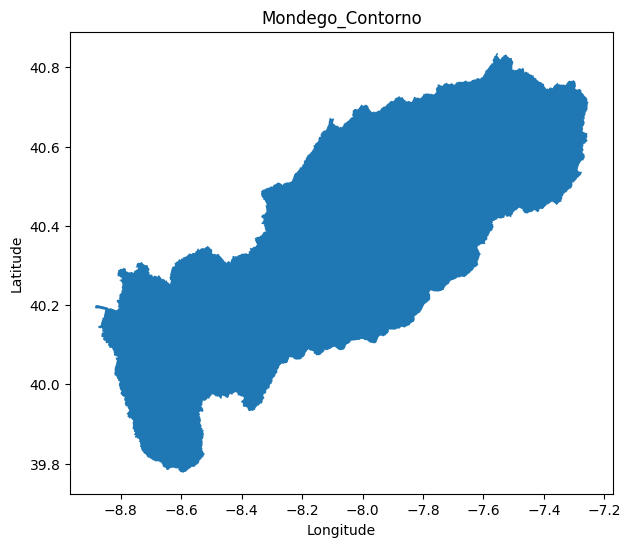

In [ ]:
study_map_location=f'/content/drive/MyDrive/Portugal ALL/task 3.5 self/flood/wise_vw_surfacewaterbody_basin_Mondego_Contorno.shp'
study_map=gpd.read_file(study_map_location)
fig, ax=plt.subplots(1, figsize=(8,6))
study_map.plot(ax=ax)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Mondego_Contorno')
plt.show()

In [ ]:
study_map=ogr.Open(f'/content/drive/MyDrive/Portugal ALL/task 3.5 self/flood/wise_vw_surfacewaterbody_basin_Mondego_Contorno.shp')
layer =study_map.GetLayer()
extent = layer.GetExtent()

xmin =extent[0]
xmax =extent[1]
ymin =extent[2]
ymax =extent[3]

print("Extent of the Study area shapefile:")    #use this extent to clip the raster files.in practical cases these values will come from users
print(f"Min X: {extent[0]}")
print(f"Max X: {extent[1]}")
print(f"Min Y: {extent[2]}")
print(f"Max Y: {extent[3]}")

Extent of the Study area shapefile:
Min X: -8.885562971952766
Max X: -7.252371435592465
Min Y: 39.777006767649084
Max Y: 40.83664625592087


# Numerical Plot

<ipython-input-14-8680e7cd10d3>:165: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot2grid((4, 4),(3,1),colspan=1,rowspan=1)


([], [])

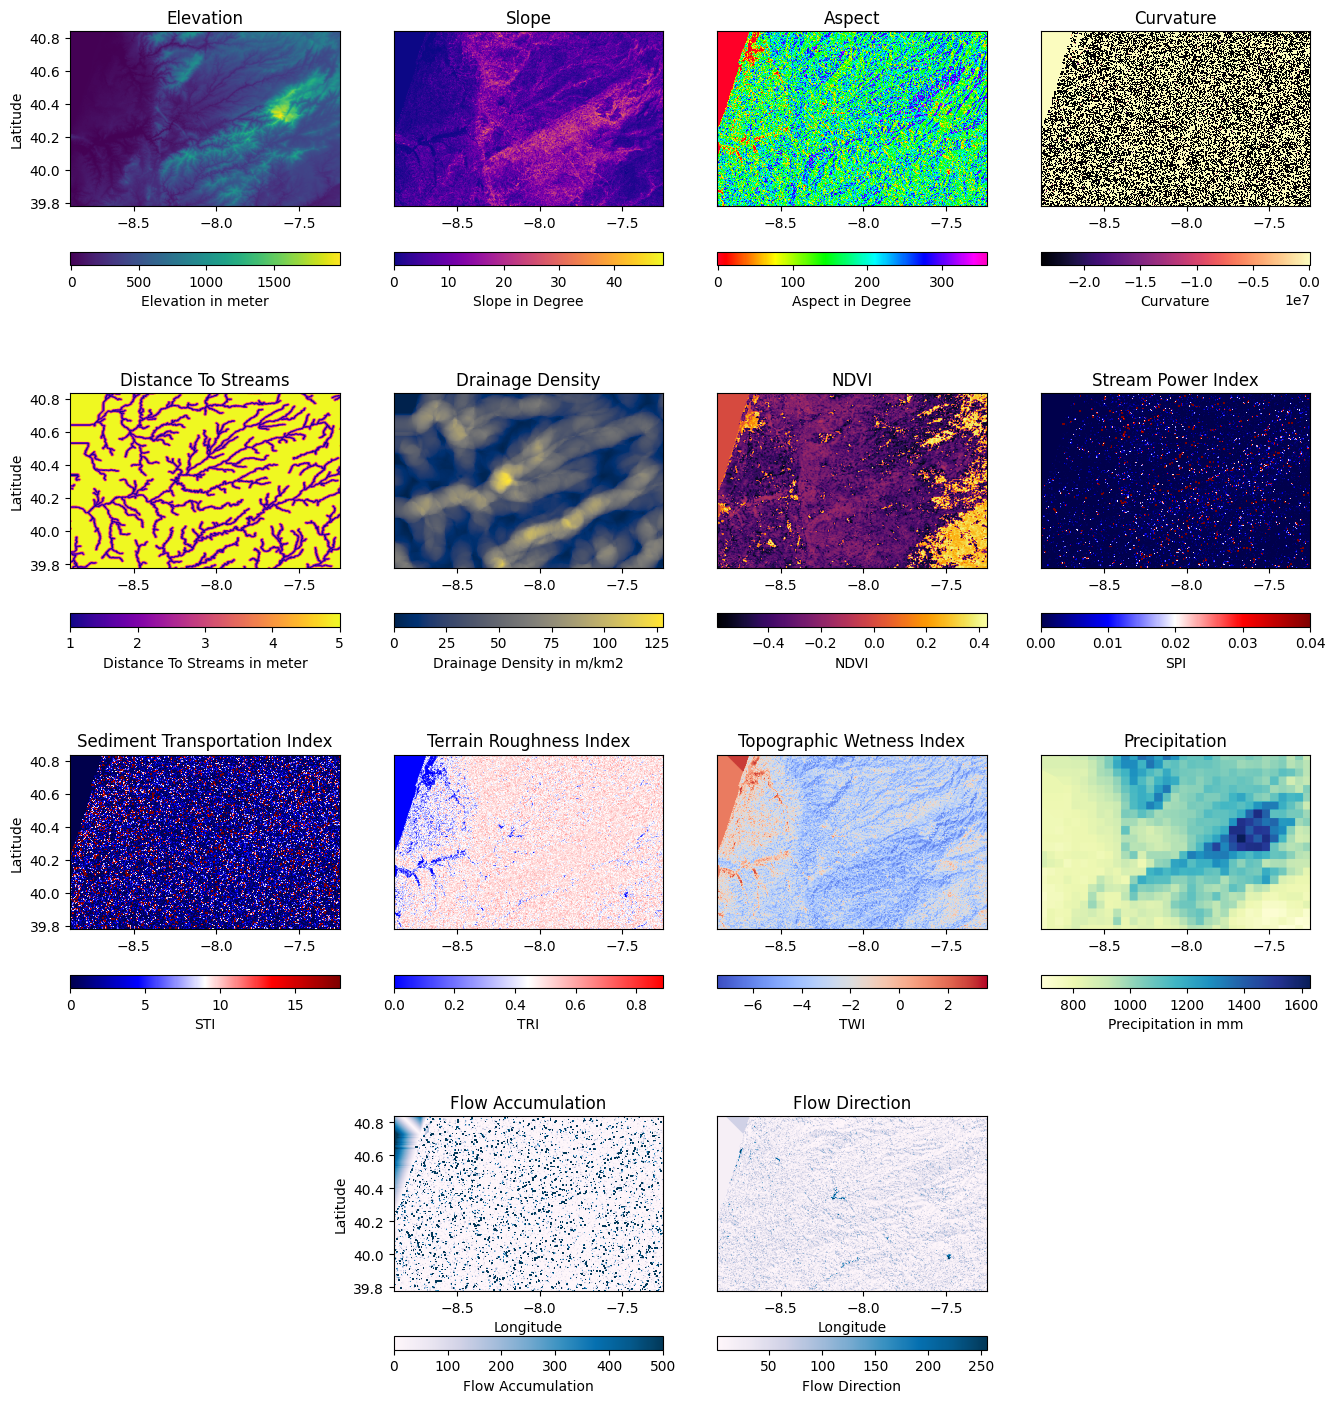

In [ ]:
fig=plt.figure(figsize=(16,18))


#dem
dem=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/dem.tif')
dem_arr=dem.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,1)
ax=plt.subplot2grid((4, 4),(0,0),colspan=1,rowspan=1)
imgplot=plt.imshow(dem_arr,extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='viridis')
ax.set_title('Elevation')
plt.colorbar(label='Elevation in meter',orientation='horizontal')
#plt.xlabel('Longitude')
plt.ylabel('Latitude')

#slope
slope=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/slope.tif')
slope_arr=slope.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,2)
ax=plt.subplot2grid((4, 4),(0,1),colspan=1,rowspan=1)
imgplot=plt.imshow(slope_arr,extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='plasma')
#imgplot.set_clim(0,50)
ax.set_title('Slope')
plt.colorbar(label='Slope in Degree',orientation='horizontal')
plt.yticks([])



#aspect
aspect=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/aspect.tif')
aspect_arr=aspect.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,3)
ax=plt.subplot2grid((4, 4),(0,2),colspan=1,rowspan=1)
imgplot=plt.imshow(aspect_arr,extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='gist_rainbow')
ax.set_title('Aspect')
plt.colorbar(label='Aspect in Degree',orientation='horizontal')
plt.yticks([])
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

#curvature
cur=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/curvature_.tif')
cur_arr=cur.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,4)
ax=plt.subplot2grid((4, 4),(0,3),colspan=1,rowspan=1)
imgplot=plt.imshow(cur_arr,extent=(xmin, xmax, ymin, ymax), origin='upper', cmap='magma')
imgplot.set_clim(-23853496,86832)
ax.set_title('Curvature')
plt.colorbar(label='Curvature',orientation='horizontal')
plt.yticks([])
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')

#distance to streams

ds=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/distance to streams.tif')
ds_arr=ds.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,5)
ax=plt.subplot2grid((4, 4),(1,0),colspan=1,rowspan=1)
imgplot=plt.imshow(ds_arr,extent=(xmin, xmax, ymin, ymax),origin='upper', cmap='plasma')
ax.set_title('Distance To Streams')
plt.colorbar(label='Distance To Streams in meter',orientation='horizontal')
#plt.yticks([])
#plt.xlabel('Longitude')
plt.ylabel('Latitude')

#drainage_density
dd=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/drainage_density.tif')
dd_arr=dd.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,6)
ax=plt.subplot2grid((4, 4),(1,1),colspan=1,rowspan=1)
imgplot=plt.imshow(dd_arr,extent=(xmin, xmax, ymin, ymax),origin='upper', cmap='cividis')
ax.set_title('Drainage Density')
plt.colorbar(label='Drainage Density in m/km2',orientation='horizontal')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.yticks([])


#NDVI

ndvi=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/NDVI.tif')
ndvi_arr=ndvi.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,7)
ax=plt.subplot2grid((4, 4),(1,2),colspan=1,rowspan=1)
imgplot=plt.imshow(ndvi_arr,extent=(xmin, xmax, ymin, ymax),origin='upper', cmap='inferno')
ax.set_title('NDVI')
plt.colorbar(label='NDVI',orientation='horizontal')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.yticks([])


#SPI

spi=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/SPI.tif')
spi_arr=spi.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,8)
ax=plt.subplot2grid((4, 4),(1,3),colspan=1,rowspan=1)
imgplot=plt.imshow(spi_arr,extent=(xmin, xmax, ymin, ymax),origin='upper', cmap='seismic')
imgplot.set_clim(0,0.04)
ax.set_title('Stream Power Index')
plt.colorbar(label='SPI',orientation='horizontal')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.yticks([])

#STI

sti=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/STI.tif')
sti_arr=sti.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,9)
ax=plt.subplot2grid((4, 4),(2,0),colspan=1,rowspan=1)
imgplot=plt.imshow(sti_arr,extent=(xmin, xmax, ymin, ymax),origin='upper', cmap='seismic')
imgplot.set_clim(0,18)
ax.set_title('Sediment Transportation Index')
plt.colorbar(label='STI',orientation='horizontal')
#plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.yticks([])

#TRI

tri=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/TRI.tif')
tri_arr=tri.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,10)
ax=plt.subplot2grid((4, 4),(2,1),colspan=1,rowspan=1)
imgplot=plt.imshow(tri_arr,extent=(xmin, xmax, ymin, ymax),origin='upper',cmap='bwr')
ax.set_title('Terrain Roughness Index')
plt.colorbar(label='TRI',orientation='horizontal')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.yticks([])

#TWI

twi=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/TWI.tif')
twi_arr=twi.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,11)
ax=plt.subplot2grid((4, 4),(2,2),colspan=1,rowspan=1)
imgplot=plt.imshow(twi_arr,extent=(xmin, xmax, ymin, ymax),origin='upper',cmap='coolwarm')
ax.set_title('Topographic Wetness Index')
plt.colorbar(label='TWI',orientation='horizontal')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.yticks([])

#precipitation

precip=gdal.Open(f'/content/drive/MyDrive/work_check_15oct/precipitation_pxl_0.004.tif')
precip_arr=precip.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,12)
ax=plt.subplot2grid((4, 4),(2,3),colspan=1,rowspan=1)
imgplot=plt.imshow(precip_arr,extent=(xmin, xmax, ymin, ymax),origin='upper',cmap='YlGnBu')
ax.set_title('Precipitation')
plt.colorbar(label='Precipitation in mm',orientation='horizontal')
#plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.yticks([])


#flow_accumulation
fa=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/flow_accumulation.tif')
fa_arr=fa.GetRasterBand(1).ReadAsArray()
ax=fig.add_subplot(3,5,13)
ax=plt.subplot2grid((4, 4),(3,1),colspan=1,rowspan=1)
imgplot=plt.imshow(fa_arr,extent=(xmin, xmax, ymin, ymax),origin='upper',cmap='PuBu')
imgplot.set_clim(0,500)
ax.set_title('Flow Accumulation')
plt.colorbar(label='Flow Accumulation',orientation='horizontal')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
#plt.yticks([])

#flow_direction
fd=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/flow_direction.tif')
fd_arr=fd.GetRasterBand(1).ReadAsArray()
#ax=fig.add_subplot(3,5,13)
ax=plt.subplot2grid((4, 4),(3,2),colspan=1,rowspan=1)
imgplot=plt.imshow(fd_arr,extent=(xmin, xmax, ymin, ymax),origin='upper',cmap='PuBu')
ax.set_title('Flow Direction')
plt.colorbar(label='Flow Direction',orientation='horizontal')
plt.xlabel('Longitude')
#plt.ylabel('Latitude')
plt.yticks([])

# Categorical Plot

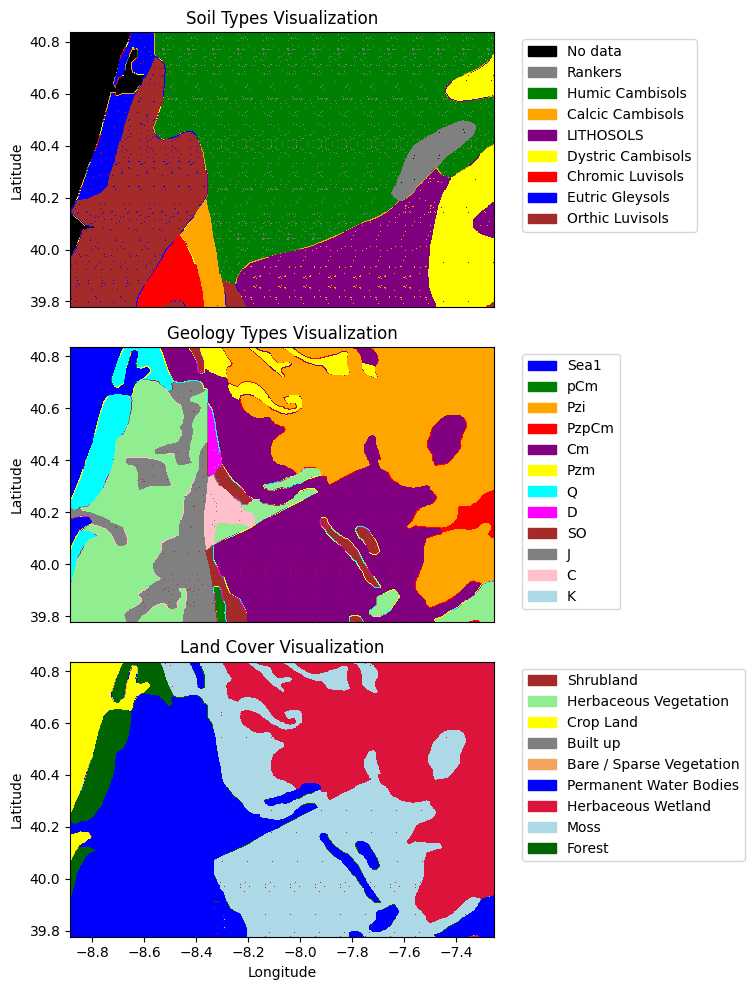

In [ ]:
fig=plt.figure(figsize=(10,10))

#soil
# Step 1: Open the raster file
ras=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/soil.tif')
data=ras.GetRasterBand(1).ReadAsArray()

data = data.astype(np.float32)  # Convert to float32 for compatibility

# Step 2: Define color map and normalization
cmap = ListedColormap(['black', 'gray', 'green', 'orange', 'purple', 'yellow', 'red', 'blue', 'brown'])
bounds = [0, 1, 2, 3, 6, 8, 9, 10, 12, 13]  # Define boundaries for categories
norm = BoundaryNorm(bounds, cmap.N)

# Step 3: Plot the data
#ax=fig.add_subplot(3,5,14)
ax=plt.subplot2grid((3,1),(0,0),colspan=1,rowspan=1)
cbar = ax.imshow(data, cmap=cmap, norm=norm,extent=(xmin, xmax, ymin, ymax))
ax.set_title('Soil Types Visualization')
#plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks([])

# Step 4: Create custom legend
legend_labels = [
    'No data',
    'Rankers',
    'Humic Cambisols',
    'Calcic Cambisols',
    'LITHOSOLS',
    'Dystric Cambisols',
    'Chromic Luvisols',
    'Eutric Gleysols',
    'Orthic Luvisols'
]

# Create patches for each legend entry based on the color map
patches = [Patch(color=cmap(i), label=legend_labels[i]) for i in range(len(legend_labels)) if i < len(cmap.colors)]
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

#geology

# Step 1: Prepare the data
# Simulating raster data as a 2D array (for example purposes)
geo=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/geology.tif')
data=geo.GetRasterBand(1).ReadAsArray()

# Step 2: Define color map and normalization
# Define colors for each geology type
cmap = ListedColormap(['blue', 'green', 'orange', 'red', 'purple', 'yellow', 'cyan', 'magenta', 'brown', 'gray', 'pink', 'lightblue', 'lightgreen'])
bounds = [5, 9, 10, 11, 12, 13, 21, 27, 28, 30, 32, 33, 35]  # Define boundaries for categories
norm = BoundaryNorm(bounds, cmap.N)

# Step 3: Plot the data
ax=plt.subplot2grid((3,1),(1,0),colspan=2,rowspan=1)
cbar = ax.imshow(data, cmap=cmap, norm=norm,extent=(xmin, xmax, ymin, ymax))

ax.set_title('Geology Types Visualization')

# Step 4: Create custom legend
legend_labels = {
    5.0: 'Sea1',
    21.0: 'Q',
    12.0: 'Cm',
    28.0: 'SO',
    13.0: 'Pzm',
    10.0: 'Pzi',
    33.0: 'K',
    30.0: 'J',
    35.0: 'N',
    27.0: 'D',
    32.0: 'C',
    11.0: 'PzpCm',
    9.0: 'pCm'
}

patches = [Patch(color=cmap(i), label=legend_labels[bounds[i]]) for i in range(len(bounds)-1) if bounds[i] in legend_labels]

# Add legend to the plot
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.xticks([])
# Step 5: Show plot with color bar
#plt.colorbar(cbar, ticks=bounds[:-1], label='Geology Types')
plt.tight_layout() # Adjust layout for better spacing



#land cover


# Step 1: Prepare the data
# Simulating raster data as a 2D array (for example purposes)

land=gdal.Open(f'/content/drive/MyDrive/all_raster_for_final_0.004_pixel/land_cover.tif')
data=geo.GetRasterBand(1).ReadAsArray()

# Step 2: Define color map and normalization
# Define colors for each land cover type based on your provided mapping
color_map = {
    23: 'darkgreen',   # Forest
    17: 'darkgreen',   # Forest
    4: 'lightgreen',   # Herbaceous Vegetation
    3: 'brown',        # Shrubland
    6: 'gray',         # Built up
    12: 'lightblue',   # Moss
    5: 'yellow',       # Crop Land
    15: 'darkgreen',   # Forest
    10: 'crimson',  # Herbaceous Wetland
    9: 'blue',         # Permanent Water Bodies
    24: 'blue',        # Permanent Water Bodies
    18: 'darkgreen',   # Forest
    21: 'darkgreen',   # Forest
    7: 'sandybrown',   # Bare / Sparse Vegetation
    16: 'darkgreen'    # Forest
}

# Create a color list based on unique values in data for plotting
unique_values = sorted(color_map.keys())
colors = [color_map[value] for value in unique_values]

# Create a colormap and normalization based on unique values
cmap = ListedColormap(colors)
bounds = unique_values + [max(unique_values) + 1]

# Ensure bounds are sorted and unique_values is also sorted for proper mapping.
norm = BoundaryNorm(bounds, cmap.N)

# Step 3: Plot the data
ax=plt.subplot2grid((3,1),(2,0),colspan=2,rowspan=1)
cbar = ax.imshow(data, cmap=cmap, norm=norm,extent=(xmin, xmax, ymin, ymax))

ax.set_title('Land Cover Visualization')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Step 4: Create custom legend patches based on the color map defined earlier
legend_labels = {
    23: 'Forest',
    17: 'Forest',
    4: 'Herbaceous Vegetation',
    3: 'Shrubland',
    6: 'Built up',
    12: 'Moss',
    5: 'Crop Land',
    15: 'Forest',
    10: 'Herbaceous Wetland',
    9: 'Permanent Water Bodies',
    24: 'Permanent Water Bodies',
    18: 'Forest',
    21: 'Forest',
    7: 'Bare / Sparse Vegetation',
    16: 'Forest'
}

# Create patches for each unique value in the legend_labels dictionary,
# but only add unique labels to the legend.
added_labels = set()
patches = []

for value in unique_values:
    label = legend_labels[value]
    if label not in added_labels:
        patches.append(Patch(color=color_map[value], label=label))
        added_labels.add(label)

# Add legend to the plot
ax.legend(handles=patches, bbox_to_anchor=(1.05, 1), loc='upper left')

# Step 5: Show plot with color bar
#plt.colorbar(cbar, ticks=unique_values + [max(unique_values)], label='Land Cover Types')
plt.tight_layout() # Adjust layout for better spacing

